# EXPLORATORY ANALYSIS AND REGRESSION: 'FLIGHT PRICE IN METRO CITIES'


# *DATASET DESCRIPTION*

## OBJECTIVE

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

# Load dataset

In [3]:
df=pd.read_csv("E:/Flight Price (final year project).csv")
df.head(11)

,Airlines,Source_City,Departure_time,Arrival_time,Destination_city,Class,Stops,Duration,Days_left,Price
0,SpiceJet,Delhi,Evening,Night,Mumbai,Economy,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,Morning,Mumbai,Economy,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,0,2.17,1,5956
3,Vistara,Delhi,Morning,Night,Mumbai,Economy,1,12.17,1,18923
4,Vistara,Delhi,Evening,Morning,Mumbai,Economy,1,15.58,1,19238
5,Vistara,Delhi,Evening,Morning,Mumbai,Economy,1,15.75,1,19920
6,Air_India,Delhi,Afternoon,Night,Mumbai,Economy,1,7.92,1,19710
7,Air_India,Delhi,Early_Morning,Night,Mumbai,Economy,1,13.25,1,19710
8,Vistara,Delhi,Early_Morning,Night,Mumbai,Economy,1,16.00,1,20130
9,Air_India,Delhi,Evening,Evening,Mumbai,Economy,1,22.75,1,19815


In [3]:
#checking of missing values
df.isnull().sum()

Airlines            0
Source_City         0
Departure_time      0
Arrival_time        0
Destination_city    0
Class               0
Stops               0
Duration            0
Days_left           0
Price               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airlines          986 non-null    object 
 1   Source_City       986 non-null    object 
 2   Departure_time    986 non-null    object 
 3   Arrival_time      986 non-null    object 
 4   Destination_city  986 non-null    object 
 5   Class             986 non-null    object 
 6   Stops             986 non-null    int64  
 7   Duration          986 non-null    float64
 8   Days_left         986 non-null    int64  
 9   Price             986 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 77.2+ KB


**Therefore our dataset contain six categorical feature and 4 numeric feature**

In [7]:
#Adding the column comibine of source city & destination city for better visualisation
df['Travelling_cities']=df['Source_City']+'-'+df['Destination_city']

In [8]:
#converting duration to minuties for better calculation
df['Duration']=df['Duration'].astype(str)
df['Duration_h']=df['Duration'].str.split('.').str[0]
df['Duration_m']=df['Duration'].str.split('.').str[1]
df['Duration_h']=df['Duration_h'].astype(int)
df['Duration_m']=df['Duration_m'].astype(int)
df['Duration_mins'] = (df['Duration_h']*60)+df['Duration_m']
df.drop(['Duration_h','Duration_m'],axis=1,inplace=True)
df['Duration']=df['Duration'].astype(float)


In [9]:
df.head()

,Airlines,Source_City,Departure_time,Arrival_time,Destination_city,Class,Stops,Duration,Days_left,Price,Travelling_cities,Duration_mins
0,SpiceJet,Delhi,Evening,Night,Mumbai,0,0,2.17,1,5953,Delhi-Mumbai,137
1,SpiceJet,Delhi,Early_Morning,Morning,Mumbai,0,0,2.33,1,5953,Delhi-Mumbai,153
2,AirAsia,Delhi,Early_Morning,Early_Morning,Mumbai,0,0,2.17,1,5956,Delhi-Mumbai,137
3,Vistara,Delhi,Morning,Night,Mumbai,0,1,12.17,1,18923,Delhi-Mumbai,737
4,Vistara,Delhi,Evening,Morning,Mumbai,0,1,15.58,1,19238,Delhi-Mumbai,958


# Summary Statistics 


In [11]:
df[['Duration','Days_left','Price','Duration_mins']].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Duration,986.0,12.099909,8.033007,0.83,5.67,10.75,17.42,39.83
Days_left,986.0,16.523327,10.571678,1.00,6.25,16.00,26.00,38.00
Price,986.0,29726.105477,24786.978142,1603.00,6488.00,20771.50,52063.00,110872.00
Duration_mins,986.0,738.910751,484.246550,60.00,360.00,667.00,1062.00,2423.00


*#we can see mean and median values are quite different from each other and mean is greater than median, which is a sign of the distribution to be Positively Skewed*

In [12]:
def distribution(data,feature):
    sns.displot(data[feature],kind='kde')
    print(data[feature].agg(['skew','kurtosis']))

skew        0.633717
kurtosis   -0.846412
Name: Price, dtype: float64


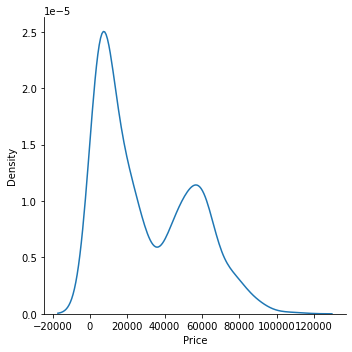

In [13]:
distribution(df,'Price')

skew        0.158882
kurtosis   -1.098389
Name: Days_left, dtype: float64


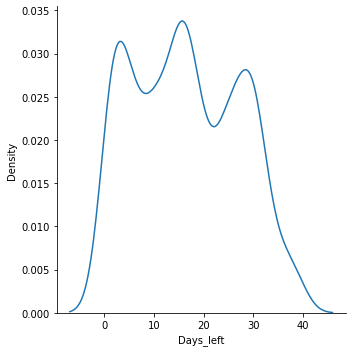

In [14]:
distribution(df,'Days_left')

skew        0.547930
kurtosis   -0.518501
Name: Duration_mins, dtype: float64


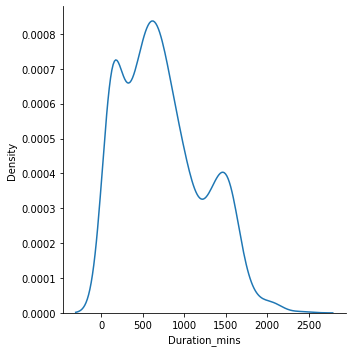

In [15]:
distribution(df,'Duration_mins')

*Hence they are positively skewed and as kurtosis values are negative we an say they are platykurtic.*

*So far, the computation we made are all based on numeric values. We have no idea about the categorical feature here. Let's look on the categorical features based on unique value counts* 

# Frequency tables and univariate plotting

The summary techniques we have used so far are suitable only for numeric variables. Categorical variables have values which are typically unordered. Therefore, we need a method to summarize categorical variables based on counts. Frequency tabulation is one way of getting a better idea of the distribution of categorical variables.

In [16]:
df['Travelling_cities'].value_counts()


Kolkata-Chennai      199
Bangalore-Chennai    186
Delhi-Kolkata        165
Kolkata-Hyderabad    154
Bangalore-Kolkata    147
Delhi-Mumbai         135
Name: Travelling_cities, dtype: int64

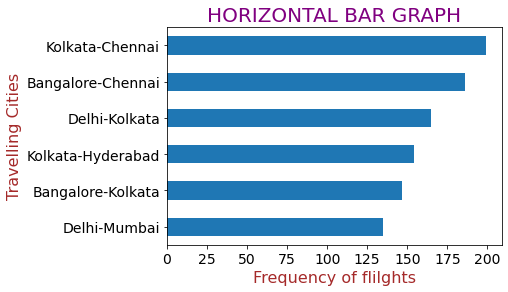

In [17]:
df.groupby(['Travelling_cities'])['Travelling_cities'].count().sort_values().plot(kind='barh',fontsize=14)
plt.title('HORIZONTAL BAR GRAPH',fontsize=20).set_color('purple')
plt.xlabel('Frequency of flilghts',fontsize=16).set_color('brown')
plt.ylabel('Travelling Cities',fontsize=16).set_color('brown')


Therefore,
 1. Maximum number of flights are found in between 'Kolkata' and  'Chennai' and the number is 199
    
 2. Least number of flights are found in between 'Delhi- Mumbai' and the number is 135


In [18]:
df.Departure_time.value_counts()

Evening          273
Morning          239
Early_Morning    196
Night            143
Afternoon        131
Late_Night         4
Name: Departure_time, dtype: int64

In [19]:
df.Arrival_time.value_counts()

Evening          294
Night            245
Morning          239
Afternoon        120
Early_Morning     67
Late_Night        21
Name: Arrival_time, dtype: int64

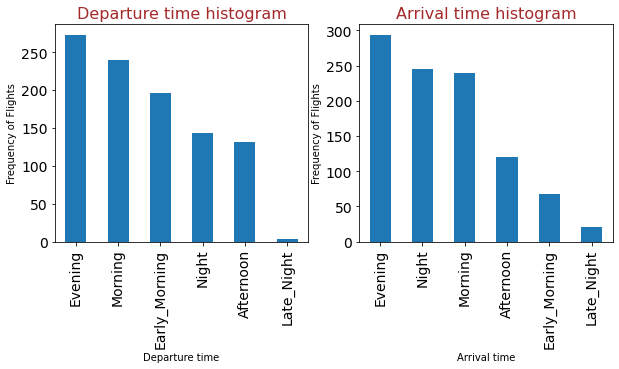

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Departure time histogram',fontsize=16).set_color("brown")
plt1 = df.Departure_time.value_counts().plot(kind='bar',fontsize=14)
plt1.set(xlabel = 'Departure time', ylabel='Frequency of Flights')



plt.subplot(1,2,2)
plt.title('Arrival time histogram',fontsize=16).set_color('brown')
plt1 = df.Arrival_time.value_counts().plot(kind='bar',fontsize=14)
plt1.set(xlabel = 'Arrival time',ylabel='Frequency of Flights')
plt.show()

According to the *bar chart* we can conclude maximum number of flights arrives and departs in the evening. Very few are noticable at late night.

In [21]:
df.Class.value_counts()

Economy     533
Business    453
Name: Class, dtype: int64

In [22]:
df.Airlines.value_counts()

Vistara      385
Air_India    318
Indigo       134
AirAsia       67
SpiceJet      46
GO_FIRST      36
Name: Airlines, dtype: int64

Text(0.5, 1.0, 'AIRLINES')

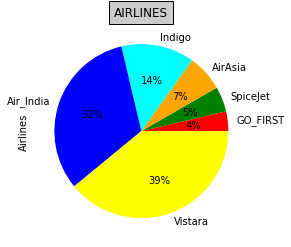

In [23]:
df.groupby('Airlines')['Airlines'].count().sort_values().plot(kind='pie',autopct='%1.0f%%',colors=['red','green','orange','cyan','blue','yellow'])
plt.title("AIRLINES",bbox={'facecolor':'0.8','pad':5})


1. Here we can see 'VISTARA' airline flies in maximum number. VISTARA is a joint venture between Tata Sons and Singapore   Airlines.The name VISTARA is symbolic of its vision of infinite expansion and the desire of the airline to become the Best Airline in INDIA to the people. Headquaters-GURGAON

2. 'GO_FIRST' flies the least number. GO_FIRST is owned by conglomerate Wadia Group.Go_First is primarily a budget airline,but it has introduced its 'frequent flyer program' GO CLUB which offers premium services such as access to airport lounges.

3. Here as we can see maximum flights are from Air_India and Vistara compare to other Airlines that is 32% and 39% respectively maybe one of the reasons behind thhis is No other Airlines have business class except  this  two.

In [73]:
df.groupby(['Airlines'])['Price'].mean()

Airlines
AirAsia       6016.925373
Air_India    35682.399371
GO_FIRST      7079.027778
Indigo        7617.820896
SpiceJet      5853.173913
Vistara      41597.205195
Name: Price, dtype: float64

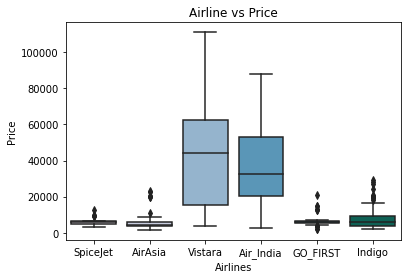

In [74]:

plt.title('Airline vs Price')
sns.boxplot(x=df.Airlines, y=df.Price, palette=("PuBuGn"))
plt.show()

In [65]:
#vistara-high
#spicejet -low
#though no. of flights are lowest in go_first price lowest in spicejet

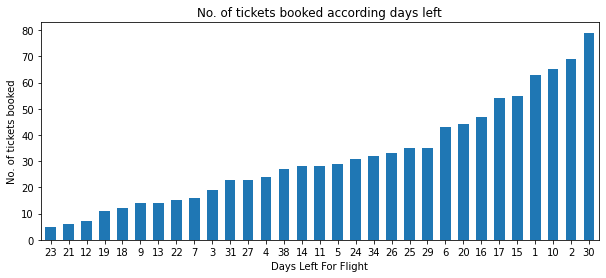

In [86]:
fig, ax = plt.subplots(figsize=(10,4))
df.groupby(['Days_left'])['Days_left'].count().sort_values().plot(kind = 'bar',width= 0.6)
ax.set(title = "No. of tickets booked according days left",
       xlabel = "Days Left For Flight",
       ylabel = "No. of tickets booked")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.show()

1. Maximum tickets has been booked 30 days before the flight.


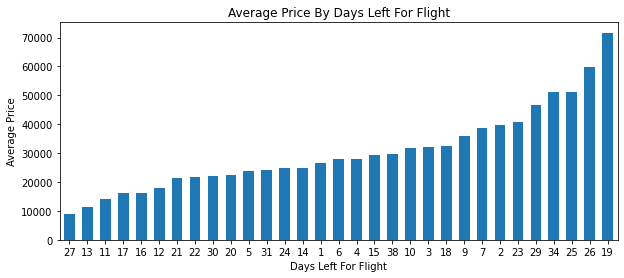

In [23]:
fig, ax = plt.subplots(figsize=(10,4))
df.groupby(['Days_left'])['Price'].mean().sort_values().plot(kind = 'bar',width= 0.6)
ax.set(title = "Average Price By Days Left For Flight",
       xlabel = "Days Left For Flight",
       ylabel = "Average Price")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.show()

Flight prices are almost same in the range 20-24 days before the flight, and high 19 days before.

### Covariance and correlation
Covariance is  basically a measure of how much two random variables change together.
The correlation coefficient is the specific measure that quantifies the strength of the linear relationship between two variable in a correlation analysis

In [5]:
print(df.corr())

              Stops  Duration  Days_left     Price
Stops      1.000000  0.563116   0.045606  0.205559
Duration   0.563116  1.000000   0.051176  0.322893
Days_left  0.045606  0.051176   1.000000  0.058669
Price      0.205559  0.322893   0.058669  1.000000


<AxesSubplot:>

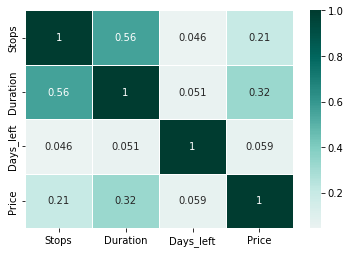

In [6]:
sns.heatmap(df.corr(),center=0,annot=True,linewidths=.8,cmap='BrBG')

The correlation matrix is a bit easier to understand, since the values are normalized. The diagonal values of the correlation matrix are all 1, as a result of the normalization. The magnitudes of the correlation values between the variables range between -1 and +1. A magnitude closer to +1 or -1 indicates a high correlation.

Some pairs of variables are weakly correlated, with small magnitudes. For example, **Price** and **Days_left** are weakly correlated, whereas **Stops** and **Duration** are strongly correlated. 

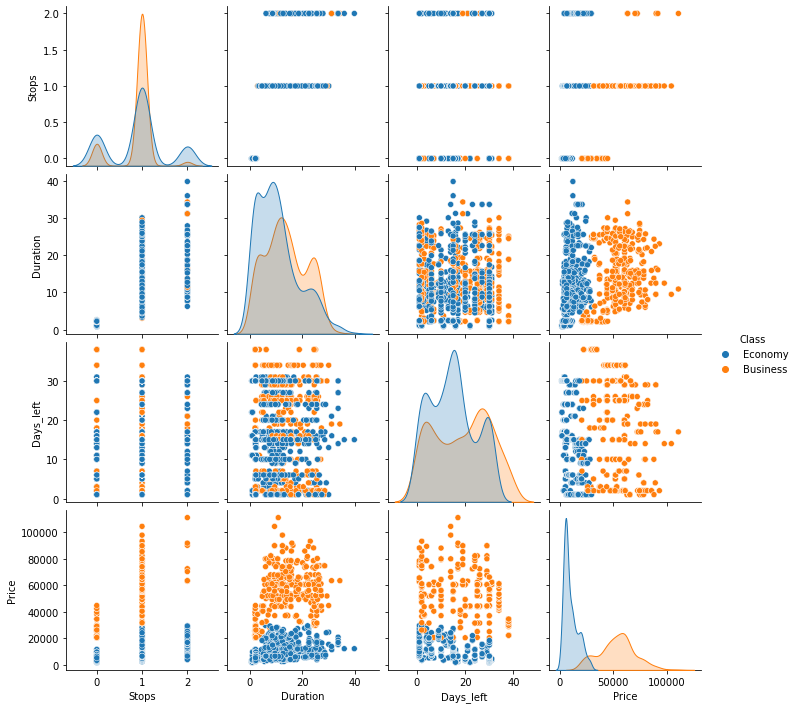

In [7]:
sns.pairplot(df,hue='Class',aspect=True)

The pairplot() function of seaborn helps in creating an axes grid through which each numeric variable present in data is shared across y-axes in the form of rows and across x-axes in form of a column. Scatter plots are created to show pairwise relationships and in the diagonal, the distribution plot is created to show the distribution of the data in the column.

# INFERENTIAL STATISTICS

# *test of homogeneity of Proportion(log-likelihood ratio test of chi square)*

In [ ]:
*H0: DISTRIBUTION ARE SAME OF BUSINESS CLASS AND ECONOMY CLASS IN DIFFERENT AIRLINES*
*H1: DISTRIBUTION OF BUSINESS CLASS AND ECONOMY CLASS IN DIFFERENT AIRLINES ARE NOT SAME*
#conclusion
*HERE WE AS P VALUE= 0.013 <0.05 at 5% level of significance we reject null hypothesis which implies there is class difference.*

In [26]:
df_table= pd.crosstab(df.Airlines,df.Class)
print(df_table)

Class      Business  Economy
Airlines                    
AirAsia           0       67
Air_India       221       97
GO_FIRST          0       36
Indigo            0      134
SpiceJet          0       46
Vistara         232      153


In [27]:
df_table2= df_table.drop(['AirAsia','GO_FIRST','Indigo','SpiceJet'])
df_table2

Class,Business,Economy
Airlines,,
Air_India,221,97
Vistara,232,153


#Here as we see value counts of AirAsia, GO_FIRST,Indigo,Spicejet are 0 or null for business class therefore this values are not necessary for our testing so we removing this given rows.Hence we get our 2*2 contingency table 

In [28]:
chi_t=stats.chi2_contingency(df_table2,lambda_='log-likelihood')
chi_t

(6.122272005344314,
 0.013348912236178838,
 1,
 array([[204.91322902, 113.08677098],
        [248.08677098, 136.91322902]]))

Though it's a log-likelihood ratio test ,which is formed by taking log of the ratio of the likelihood under the nulll model,divide by alternative model Here test statistic is Chi-Squared distributed.
However, #our result is Test statistic: 6.122
                    #degree of freedom: 1
                    ## p value:0.013
                    **As p value <0.05 at 5% level of significance we reject H0: the proportion of two classes are equal.
  Here as it is a 2*2 contingency table and we don't have much data 'Fisher-exact test' can also be applied for our testing.**                     
                        

##stats.fisher_exact(observed_values)

###We perform Fisher-exact test as its a 2*2 contingency table and we need to identify p value for the data. 
Odds ratio: 1.502
 p value: 0.011
**As p value 0.011<0.05 we reject null hypothesis.**    

# *categorsing dataframe according number of stops between Travelling cities and proceeding to determine further results*

In [29]:
Stops2=df[df.Stops==2]
Stops1=df[df.Stops==1]
Stops0=df[df.Stops==0]


In [30]:
df.Price.groupby(df.Stops).agg(['count','median','mean','std','max','min'])

,count,median,mean,std,max,min
Stops,,,,,,
0,185,5955.0,11548.735135,11006.144604,44664,1603
1,711,37016.0,35518.376934,25300.210499,104255,2480
2,90,16443.0,21331.755556,20415.548513,110872,3961


<AxesSubplot:xlabel='Stops', ylabel='Price'>

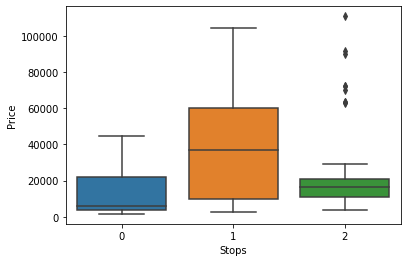

In [31]:
sns.boxplot(x=df['Stops'],y=df['Price'])

#so there are outliers for flights with 2 stops and we can remove them before proceeding into any further testing procedure for better results

In [32]:
#REMOVING OUTLIERS
Q1=np.percentile(Stops2['Price'],25)
Q3=np.percentile(Stops2['Price'],75)
IQR=Q3-Q1
upper=np.where(Stops2['Price']>=(Q3+1.5*IQR))
lower=np.where(Stops2['Price']<=(Q1-1.5*IQR))
Stops2_=Stops2.reset_index(drop=True)
Stops2_.drop(upper[0],inplace= True)
Stops2_.shape

(81, 12)

In [33]:
#Let's check the normality for the following:
def normality(data,feature):
    test_stat,pvalue=stats.shapiro(data[feature])
    if pvalue<=0.05:
        print('Prices of flights with %s stops do not follow NORMAL DISTRIBUTION'%data['Stops'].unique())
    else:
        print('Prices of flights with %s stops follows NORMAL DISTRIBUTION'%data['Stops'].unique())       

In [34]:
normality(Stops2_,'Price')
normality(Stops0,'Price')
normality(Stops1,'Price')

Prices of flights with [2] stops follows NORMAL DISTRIBUTION
Prices of flights with [0] stops do not follow NORMAL DISTRIBUTION
Prices of flights with [1] stops do not follow NORMAL DISTRIBUTION


In [35]:
def normality_fig(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=plt)
    plt.show()


#Hence airlines with two stops follows normal distribution but airlines with one and non stop doesn't follow normal distribution.So we need to follow non-parametric test unless we able to tranform those data to normal distribution.
#By applying logarithmic,exponential,box-cox transformation also we are unable to  convert the data to normal distribution
#therefore let's proceed to nonmarametric test 

**H0: price mean are equal for all stops airlines/ prices do not depend on number of stops between travelling cities**

**H1: there is atleast one type for which mean price is different/prices varries according number of stops between travelling cities**   

In [58]:
t_stat,pvalue=stats.kruskal(Stops0['Price'],Stops1['Price'],Stops2_['Price'])
print(pvalue)
if pvalue<=0.05:
    print('we reject null hypothesis')
else:
    print('we fail to reject null hypothesis')

7.445339051955684e-40
we reject null hypothesis


#we reject null hypothesis therefore there is significance difference in between

In [ ]:
#here we apply kruskal-wallis test to determine effect of stops in the journey which is equivalent to one way anova test in case of parametric test
#Also as we are using kruskal-wallis non parametric test we don't really need to remove the outlier for prices with 2 stps flights .Therefore using whole prices without removing any outliers

# test between price & class price - airlines, price-days_left 

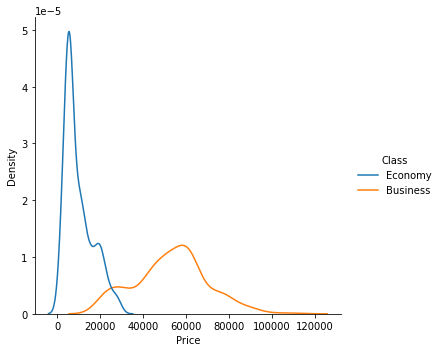

In [37]:
sns.displot(df,x='Price',hue='Class',kind='kde')

<AxesSubplot:xlabel='Price', ylabel='Class'>

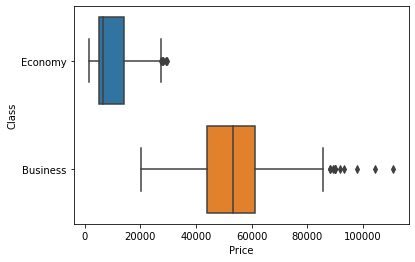

In [38]:
sns.boxplot(x=df['Price'],y=df['Class'])

In [39]:
df.Price.groupby(df.Class).mean()



Class
Business    53014.573951
Economy      9933.091932
Name: Price, dtype: float64

# REGRESSION ANALYSIS

In [5]:
def preprocessing(df):
    df["Class"] = df["Class"].replace({'Economy':0,'Business':1}).astype(int) #Encode the ordinal variable
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["Airlines","Source_City","Destination_city","Departure_time","Arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    df = df.drop(['Airlines','Source_City','Destination_city','Departure_time','Arrival_time','Travelling_cities','Duration_mins'],axis=1)
    
    return df

In [10]:
df_new=preprocessing(df)

In [11]:
df_new.tail()

,Class,Stops,Duration,Days_left,Price,Airlines_Air_India,Airlines_GO_FIRST,Airlines_Indigo,Airlines_SpiceJet,Airlines_Vistara,...,Departure_time_Early_Morning,Departure_time_Evening,Departure_time_Late_Night,Departure_time_Morning,Departure_time_Night,Arrival_time_Early_Morning,Arrival_time_Evening,Arrival_time_Late_Night,Arrival_time_Morning,Arrival_time_Night
981,0,2,33.67,30,16552,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
982,0,2,22.58,30,16844,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
983,0,2,25.58,30,16844,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
984,0,2,33.67,30,16844,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
985,0,1,4.75,30,18308,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [12]:
def make_mi_scores(X,Y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname]= X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X,Y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores,name="MI Scores",index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [13]:
X= df_new.copy()
y= X.pop("Price")

mi_scores = make_mi_scores(X, y)

In [14]:
print(mi_scores.sort_values(ascending=False))#mutual info regressor score to check dependency

Days_left                       1.638352
Duration                        0.663298
Class                           0.657075
Stops                           0.387963
Source_City_Kolkata             0.361054
Airlines_Vistara                0.354626
Airlines_Air_India              0.335507
Source_City_Delhi               0.329128
Destination_city_Kolkata        0.324633
Destination_city_Hyderabad      0.241178
Destination_city_Mumbai         0.229284
Airlines_Indigo                 0.205412
Airlines_SpiceJet               0.105498
Departure_time_Morning          0.097862
Arrival_time_Early_Morning      0.088506
Airlines_GO_FIRST               0.081912
Departure_time_Night            0.081407
Departure_time_Evening          0.074861
Arrival_time_Night              0.065387
Arrival_time_Morning            0.060487
Arrival_time_Evening            0.060131
Arrival_time_Late_Night         0.038306
Departure_time_Early_Morning    0.038073
Departure_time_Late_Night       0.000600
Name: MI Scores,

In [15]:
 x_train,x_test,y_train,y_test = train_test_split(X,y,random_state =42,test_size=0.3, shuffle=True)

In [16]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [18]:
lm.score(x_train,y_train)

0.8518703150750477

In [19]:
y_pred =  lm.predict(x_test)
score=r2_score(y_test,y_pred)
print('r2 socre: ',score)
print('mean_sqrd_error: ',mean_squared_error(y_test,y_pred))
print('root_mean_squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))



r2 socre:  0.812924533365962
mean_sqrd_error:  118002255.48213412
root_mean_squared error: 10862.884307684313


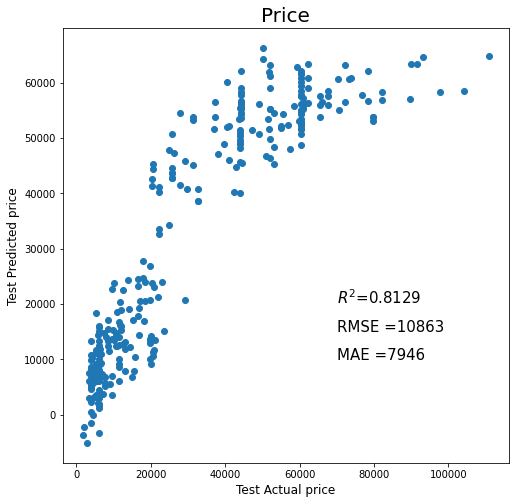

In [20]:
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title("Price",fontsize=20)
ax.set_ylabel('Test Predicted price',fontsize=12)
ax.set_xlabel('Test Actual price',fontsize=12)
ax.scatter(y_test,y_pred)

score_r2 = r2_score(y_test, y_pred) 
score_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
score_mae = mean_absolute_error(y_test,y_pred)
plt.text(70000,20000,'$ R^{2} $=' + str(round(score_r2, 4)),fontsize=15)
plt.text(70000,15000,'RMSE =' + str(round(score_rmse)),fontsize=15)
plt.text(70000,10000,'MAE =' + str(round(score_mae)),fontsize=15)
plt.show()

In [ ]:
#####

In [57]:
Duration_h = sm.add_constant(df['Duration'], prepend=False)
model = sm.OLS(df['Price'], Duration_h)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     114.5
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           2.32e-25
Time:                        22:09:06   Log-Likelihood:                -11321.
No. Observations:                 986   AIC:                         2.265e+04
Df Residuals:                     984   BIC:                         2.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Duration     996.3321     93.098     10.702      0.0

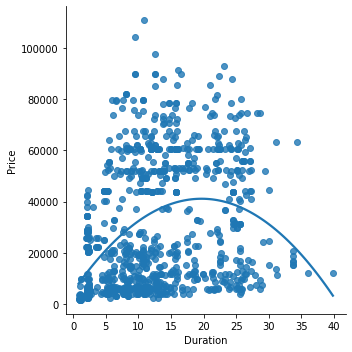

In [56]:
sns.lmplot(data=df,x='Duration',y='Price',order=2,ci=None)

In [ ]:
#therefore it is a non-linear fit so we can proceed to polynomial regression